# SVM Assignment

## 1. Setup

Import modules

In [110]:
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


np.random.seed(1)

In [111]:
## 2. Load data

Load data (it's already cleaned and preprocessed)

In [112]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
#import os
#print(os.getcwd())

In [113]:
df = pd.read_csv('./data/RidingMowers.csv') # let's use the same data as we did in the logistic regression example
df.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner


In [114]:
df.dtypes

Income       float64
Lot_Size     float64
Ownership     object
dtype: object

In [115]:
df.isnull().sum()

Income       0
Lot_Size     0
Ownership    0
dtype: int64

In [116]:

y = df.pop('Ownership')
X = df

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=1)


In [118]:
LabelEncoding = preprocessing.LabelEncoder()
y_train = LabelEncoding.fit_transform(y_train)
y_test = LabelEncoding.transform(y_test)

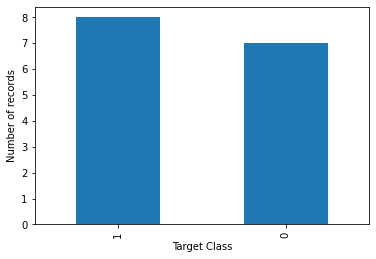

In [119]:
y_train = pd.Series(y_train)
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

The dataset seems to be balanced

## 3. Model the data

First, let's create a dataframe to load the model performance metrics into.

In [120]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### 3.1 Fit a SVM classification model using linear kernal

In [121]:
svm_lin_model = SVC(kernel="linear", probability=True)
_ = svm_lin_model.fit(X_train, np.ravel(y_train))

In [122]:
model_preds = svm_lin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 3.2 Fit a SVM classification model using rbf kernal

In [123]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale', probability=True)
_ = svm_rbf_model.fit(X_train, np.ravel(y_train))

In [124]:
model_preds = svm_rbf_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 3.3 Fit a SVM classification model using polynomial kernal

In [125]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10, probability=True)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [126]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

In [127]:
performance

,model,Accuracy,Precision,Recall,F1
0,linear svm,0.888889,1.0,0.75,0.857143
0,rbf svm,0.666667,1.0,0.25,0.400000
0,poly svm,0.777778,1.0,0.50,0.666667


As the dataset is quite balanced and according to our problem of predicting the ownership we will be using Accuracy as the performance metric to choose the best model

The best model is Linear SVM with the accuracy of 88.8 percent

In [128]:
import pickle

# save model
pickle.dump(svm_lin_model, open('./data/svm_lin_model.pkl', "wb"))

# If you wish to load this model later, simply use pickle.load method
#loaded_model = pickle.load(open('logistic_model_example01.pkl', "rb"))